# AML Practical 1.1

<b>Name:</b> Patel Jaynil Sunilkumar<br>
<b>Roll No:</b> 20MCED08<br>
<b>Course Name:</b> 3CS1111 Applied Machine Learning




### 1) Read the text from given Image using tesseract

<img src = "class.png" width="90%" height = "80%">

In [5]:
from PIL import Image
import pytesseract as pt

img = Image.open('class.png')
imgText = pt.image_to_string(img,lang='eng')
print(imgText)

Classification - Machine Learning

Classification is a type of supervised learning. It specifies the class to which data elements belong to and is best used when the output has finite and discrete values. It predicts a class

Types of Classification Algorithms
Let’s have a quick look into the types of Classification Algorithm below.

-Linear Models
Logistic Regression
Support Vector Machines
-Nonlinear models
K-nearest Neighbors (KNN)
Kernel Support vector Machines (SVM)
Naive Bayes
Decision Tree Classification
Random Forest Classification



# 1.2 Linear Regression using sklearn.linear_model

In [97]:
import numpy as np
import pandas as pd
from sklearn import datasets,metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error
from sklearn.datasets import load_boston

bos = load_boston()
bos_df = pd.DataFrame(bos.data)


In [98]:
bos_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [99]:
bos_df.columns = bos.feature_names
bos_df['PRICE'] = bos.target
X = bos_df.drop('PRICE', axis = 1)
y = bos_df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.21,random_state = 3) 

In [100]:
lr_model = LinearRegression()

lr_model.fit(X_train,y_train)
pre_y = lr_model.predict(X_test)
print("MAE = ",mean_absolute_error(y_test,pre_y))
print("MSE =",mean_squared_error(y_test,pre_y))
print("Model accuracy = " , (lr_model.score(X_test,y_test)*100))

MAE =  2.926678561960011
MSE = 16.255782909135814
Model accuracy =  80.2232232582644


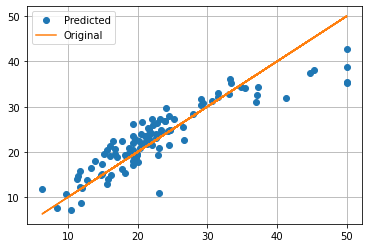

In [101]:
import matplotlib.pyplot as plt
plt.plot(y_test,pre_y,marker='o',linestyle='',label="Predicted")
plt.plot(y_test,y_test, label="Original")

plt.legend(loc='best')
plt.grid()
plt.show()

<p>
As we can see from the above graph predicted vs original values. We can see that our model performed well with 80℅ accuracy and very less MSE.</p>

# 1.3 Linear Regression using SGDRegressor

In [6]:
import numpy as np
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

X, y = datasets.load_boston(return_X_y=True)
X_train=X[0:400,:]
y_train=y[0:400]
X_test=X[400:506,:]
y_test=y[400:506]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler=StandardScaler()
scaler.fit(X_train[:,1:])
X_train[:,1:]=scaler.transform(X_train[:,1:])
X_test[:,1:]=scaler.transform(X_test[:,1:])


mae_list = []
mse_list = []
iter_list = [50000,100000,500000,1000000,2000000,5000000]
def linear_cal(intr):
        regr = linear_model.SGDRegressor(max_iter=intr,learning_rate='invscaling',eta0=0.01)
         # Train the model using the training sets
        regr.fit(X_train, y_train)
        pre_y=regr.predict(X_test)
        metrics.mean_squared_error(y_test,pre_y)
        mae = metrics.mean_absolute_error(y_test,pre_y)
        mse = metrics.mean_squared_error(y_test,pre_y)
        mae_list.append(mae)
        mse_list.append(mse)
        #print("MAE = ",mae)
        #print("MSE =",mse)
        
for iter_value in iter_list:
     linear_cal(iter_value)

    

# Graph 

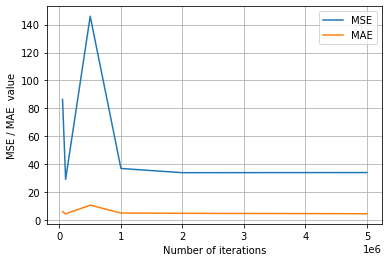

In [7]:
import matplotlib.pyplot as plt
plt.plot(iter_list,mse_list, label="MSE")
plt.plot(iter_list,mae_list, label="MAE")
plt.xlabel('Number of iterations')
plt.ylabel('MSE / MAE  value')
plt.legend(loc='best')
plt.grid()
plt.show()


# Observation

<p> As we can see from the above diagram (No of iterations vs error values), We can see that as the number of iterations increases the error starts decreasing up to a certain value then it's getting settling to a particular value.</p>